# Data Import and Review

When starting out learning to code in Python, there may be a few simple tasks that seem unneccessarily complex.  Importing data is one such task, where in Excel we click on a file to open it and most of the time the program already knows whether a cell contains a number or text.  In Python we don't have to declare the type of data explicitly, but the example below demonstrates the process of importing a file of time series data where the raw data format requires an extra step before we can work with the data.

There is a limit to the size of dataset we can manually review for anomalies.  As data gets bigger, it becomes necessary to evaluate our dataset in ways that don't require scanning tens or hundreds of thousands of rows.  In this example, we import a comma-separated-value (csv) file from a measurement device.  This notebook provides an introduction to opening and reviewing files programmatically.  

One final note, the '#' symbol used extensively below is used for adding comments that the code interpreter ignores.  The interpreter ignores all lines starting with '#', as well as anything after a '#' symbol on a line that doesn't start with '#'.

In [1]:
# import libraries
# pandas is a library that manipulates "dataframes", table-like structures,
# to efficiently run operations on large datasets
import pandas as pd
# numpy is a fundamental library for scientific computing
# based on the representation of data as arrays
import numpy as np
# matplotlib is a plotting library
from matplotlib import pyplot as plt

# this is a command to tell the notebook to display figures
# within the notebook instead of creating new windows.
%matplotlib inline

## Import Data

Now we want to import data from a folder.  Another common difficulty is in recognizing how the program interprets file paths.  If we want to open a data file from within this notebook, it is important to know that Jupyter interprets file paths **relative** to the location of the Jupyter notebook file.

In this case, the file we are working with is "Data_Import_and_Review.ipynb", and it's saved under "*(something)*/Engineering_Hydrology_Notebooks/Introduction/Data_Import_and_Review.ipynb", where *(something)* is wherever you saved and unpacked the main repository file on your computer.  

If we had a datafile (let's call it *CIVL418_Hidden_Creek_H_data.csv*) in the same folder as our notebook file, we can simply call the filename.  With pandas, it would be like so:

`df = pd.read_csv('CIVL418_Hidden_Creek_H_data.csv')`

Looking at our file structure, there is a folder called *data_review* that contains a number of csv files.  If we try and import one of these files using strictly the filename, we'll see an error like:

```
FileNotFoundError                         Traceback (most recent call last)
<ipython-input-5-b872b6bb0ac8> in <module>
      3 # in this case  is located in the
      4 # Open the folder and navigate to where
----> 5 df = pd.read_csv('CIVL418_Hidden_Creek_H_data.csv')
```

This error occurs because Jupyter looks for the file in the same level directory as our file.  We can tell it to look up one level in the file directory by starting the path string with double ellipsis, `..`.   

If we try the script below, our notebook will look for *CIVL418_Hidden_Creek_H_data.csv* one level up from the *Introduction* folder, which puts us at the level of `Engineering_Hydrology_Notebooks/`.  Before moving on, ask yourself if this path will work?  

`df = pd.read_csv('../CIVL418_Hidden_Creek_H_data.csv')`

The path won't work because there is no file named *CIVL418_Hidden_Creek_H_data.csv* found in the folder `Engineering_Hydrology_Notebooks/`.  The file is saved in the `data_review` folder that is however in this folder, so we construct the path as follows:

`../data_review/CIVL418_Hidden_Creek_H_data.csv`

Let's import our data now.

In [6]:
# import data from the 
# note the file path is RELATIVE to the location of the notebook file we're working in
df = pd.read_csv('../data_review/CIVL418_Hidden_Creek_H_data.csv')
df.describe(include='all')

,ID,PARAM,Date,year,month,day,Value
count,677,677.0,677,677.000000,677.000000,677.000000,677
unique,1,NaN,677,NaN,NaN,NaN,406
top,00XX000,NaN,2012/06/17,NaN,NaN,NaN,NaN
freq,677,NaN,1,NaN,NaN,NaN,87
mean,NaN,2.0,NaN,2011.079764,6.446086,15.819793,NaN
std,NaN,0.0,NaN,0.674661,3.574085,8.853510,NaN
min,NaN,2.0,NaN,2010.000000,1.000000,1.000000,NaN
25%,NaN,2.0,NaN,2011.000000,3.000000,8.000000,NaN
50%,NaN,2.0,NaN,2011.000000,6.000000,16.000000,NaN
75%,NaN,2.0,NaN,2012.000000,10.000000,24.000000,NaN


Looking at the stats of the above dataframe, it appears as though the 'Value' column has non-numeric values.  We can tell this by trying to perform a calculation on the column.  If calculating the mean doesn't work, there could be a few explanations.

In [7]:
df['Value'].mean()

TypeError: Could not convert  0.830.876 1.160.8670.7110.6320.6960.8070.7140.6850.6740.6520.6490.6210.6080.5790.6260.676 1.35 1.190.8830.7860.7980.7430.838 1.89 2.74  1.8 1.18 1.08 1.56 1.35 2.81 2.39 2.85 1.76 1.31 1.090.949 0.830.7420.6710.6210.5740.586 1.56  2.8 1.45 1.190.9930.8550.7630.6950.6420.5920.5620.5190.4850.882 0.83 2.26 1.73 1.59 1.25 1.09  1.1 1.01  1.5 2.79 2.49 1.68 1.47 1.56 1.46 2.26 1.51 1.25 1.080.9570.8690.8030.765 0.89 1.45 1.19 1.070.9160.538 0.370.735 1.44 1.150.6390.4920.5260.4850.4580.4910.5120.4780.4470.423 0.320.4070.482 1.37 1.43 1.05 0.82 2.01 2.09 1.67 1.29 1.050.876 0.770.6910.6280.5880.5690.594 1.13 1.96 1.54  1.20.9730.8170.7490.8060.6090.6310.4940.4210.4210.4580.6840.6890.4730.4330.1490.1870.508 1.37 1.97 2.31 2.62 1.85 1.39 1.140.9720.848 0.750.6950.6790.6890.7210.7170.7730.7070.4020.4030.4690.5140.5650.6610.6340.6840.6590.589 0.540.5150.6280.721 0.820.9610.6880.5930.5140.4410.4030.3710.3530.3240.2930.3850.3390.265 0.270.2530.2860.2890.2710.2710.2550.2410.2340.2790.5430.6110.6330.799 1.26  1.2  1.20.8580.6710.5780.5120.4950.5270.5070.4720.4870.5060.5030.5320.6040.741 1.31 1.26 1.040.8830.7810.7170.6750.6040.5430.5220.5460.8970.7620.6680.6550.6130.5830.5480.5080.4780.4440.4220.4120.4290.493 0.630.731 0.840.8820.7850.7360.7280.854 1.01 1.02 1.11 1.22 1.27 1.25 1.17  1.3    2 2.07 1.61 1.79 2.38 2.18 1.91 1.69 1.66 1.94 2.19 2.05 1.98 1.85 1.83 2.03 1.79 1.59  1.6 1.94 1.95 2.09 2.04 1.97 2.02  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN 2.13 2.09    2 1.98 2.04 1.85 1.69 1.88  1.9 2.23 1.89 1.69 1.67 1.77 1.88 1.88 1.77 1.74 1.67 1.56 1.49 1.46 1.38 1.28  1.2 1.15 1.15 1.18 1.16 1.23 1.34  1.8 1.86 1.42  1.4 1.34 1.25 1.27 1.31 1.22 1.25 1.080.9560.8460.8340.8420.8610.8580.8870.9480.977 1.02 0.99 0.920.8370.8490.9970.908 1.190.9660.754 0.66 1.65 2.71 1.66 1.73 2.46 3.09 2.03 1.41 1.12 0.940.838 1.43 1.36 1.110.9590.9180.849 1.01 1.14 3.07 2.66  1.9 1.43 1.180.9820.8380.742  0.7 1.09  1.3 1.43  1.4 1.070.8780.7740.7120.7030.7690.923 1.070.8510.7550.7210.6680.6210.5730.536 0.520.5240.9040.9530.8660.7530.6870.6180.5930.6010.5570.4910.4630.4660.928 1.240.798 0.660.626 3.35  2.1 1.45 1.18 1.030.9060.8190.745 0.69 0.650.6150.5740.545 0.530.5090.469 0.46 0.450.4360.4260.4430.5790.5470.5210.4880.4530.4440.4740.5290.5860.573 1.19  1.6 1.180.9560.7920.7390.933 2.08 2.13  1.4 1.110.953 1.17 1.150.9740.8470.7590.7060.6530.6120.5730.4990.524 0.510.6890.6390.5810.5750.7040.6480.5590.5060.6620.8550.8550.8410.7270.6780.7030.688 0.650.6280.6110.6220.6860.8640.8470.7720.7070.6490.5980.5620.624 0.580.5210.5010.5550.5450.5160.504 0.470.4030.3830.3730.3420.3310.3410.452  0.70.6050.4920.4450.4650.5870.6740.6360.5680.4840.6640.7590.6210.5320.4750.4280.3970.3770.3640.3460.3540.4160.4610.6360.9930.9010.7710.6630.6090.6230.6680.6280.5850.553 0.550.6340.924 1.24 1.28 1.26 1.22 1.17 1.18 1.24 1.15  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN 1.94  1.8 1.89  2.5 2.61 2.17 1.89 1.86 1.82 1.75 1.87 1.67  1.6 1.76 2.07 2.24 2.13 1.87 2.24 2.95 2.63 2.16 2.01 2.24 2.43 2.56 2.39 2.06 2.04 1.95    2 2.38 2.71 3.02 to numeric

We can see the mean calculation throws an informative error:

    ValueError: could not convert string to float:

When you import a csv with pandas, it will try to figure out the type of each column.  If pandas can't figure it out, it will leave the values as strings.  In this case, and this is very common when working with files coming from different places (other software, hardware systems, etc.), some values which are non-numeric are included somewhere in the file.  We don't want to go through a big csv and manually change the files, because what if we have to deal with hundreds of files, or millions of rows?

We can verify the type of values in the column by calling type, (and we need to check one row, so I've indexed row 0 below).  Indeed, the type is string.

In [80]:
print(type(df['Value'][0]))

<class 'str'>


We can change the type of values in a few ways.  Let's try using the `.astype()` function from pandas.

In [82]:
df['Value'] = df['Value'].astype(float)
print(type(df['Value'][0]))

<class 'numpy.float64'>


We can see the type is now float.  Let's try calculating a mean again.  

In [84]:
df['Value'].mean()

1.0374559322033898

Now if we plot the value, we can see there are a couple of breaks in the series.

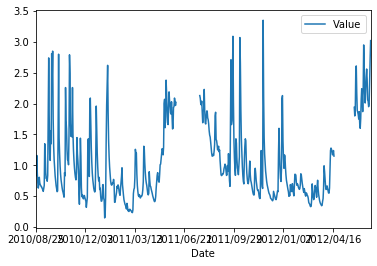

In [88]:
df.plot('Date', 'Value')

We can also see what periods correspond to gaps by filtering for the `nan` values.

In [91]:
gaps = df[df['Value'].isnull()]

gaps

,ID,PARAM,Date,year,month,day,Value
284,00XX000,2,2011/06/05,2011,6,5,NaN
285,00XX000,2,2011/06/06,2011,6,6,NaN
286,00XX000,2,2011/06/07,2011,6,7,NaN
287,00XX000,2,2011/06/08,2011,6,8,NaN
288,00XX000,2,2011/06/09,2011,6,9,NaN
...,...,...,...,...,...,...,...
638,00XX000,2,2012/05/24,2012,5,24,NaN
639,00XX000,2,2012/05/25,2012,5,25,NaN
640,00XX000,2,2012/05/26,2012,5,26,NaN
641,00XX000,2,2012/05/27,2012,5,27,NaN


What else can we do to avoid all this work?

Now that we know how the `nan` values are represented in the file, if we know we'll be dealing with more files from this source in the future, we can either address it at the source (change how values are recorded and saved).  Usually we don't have control over this, but we can address it at the point of import.

In [98]:
df = pd.read_csv('data_review/CIVL418_2019_Hidden_Creek_H_data.csv', na_values=['NaN'])
df['Value'].mean()

TypeError: Could not convert  0.830.876 1.160.8670.7110.6320.6960.8070.7140.6850.6740.6520.6490.6210.6080.5790.6260.676 1.35 1.190.8830.7860.7980.7430.838 1.89 2.74  1.8 1.18 1.08 1.56 1.35 2.81 2.39 2.85 1.76 1.31 1.090.949 0.830.7420.6710.6210.5740.586 1.56  2.8 1.45 1.190.9930.8550.7630.6950.6420.5920.5620.5190.4850.882 0.83 2.26 1.73 1.59 1.25 1.09  1.1 1.01  1.5 2.79 2.49 1.68 1.47 1.56 1.46 2.26 1.51 1.25 1.080.9570.8690.8030.765 0.89 1.45 1.19 1.070.9160.538 0.370.735 1.44 1.150.6390.4920.5260.4850.4580.4910.5120.4780.4470.423 0.320.4070.482 1.37 1.43 1.05 0.82 2.01 2.09 1.67 1.29 1.050.876 0.770.6910.6280.5880.5690.594 1.13 1.96 1.54  1.20.9730.8170.7490.8060.6090.6310.4940.4210.4210.4580.6840.6890.4730.4330.1490.1870.508 1.37 1.97 2.31 2.62 1.85 1.39 1.140.9720.848 0.750.6950.6790.6890.7210.7170.7730.7070.4020.4030.4690.5140.5650.6610.6340.6840.6590.589 0.540.5150.6280.721 0.820.9610.6880.5930.5140.4410.4030.3710.3530.3240.2930.3850.3390.265 0.270.2530.2860.2890.2710.2710.2550.2410.2340.2790.5430.6110.6330.799 1.26  1.2  1.20.8580.6710.5780.5120.4950.5270.5070.4720.4870.5060.5030.5320.6040.741 1.31 1.26 1.040.8830.7810.7170.6750.6040.5430.5220.5460.8970.7620.6680.6550.6130.5830.5480.5080.4780.4440.4220.4120.4290.493 0.630.731 0.840.8820.7850.7360.7280.854 1.01 1.02 1.11 1.22 1.27 1.25 1.17  1.3    2 2.07 1.61 1.79 2.38 2.18 1.91 1.69 1.66 1.94 2.19 2.05 1.98 1.85 1.83 2.03 1.79 1.59  1.6 1.94 1.95 2.09 2.04 1.97 2.02  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN 2.13 2.09    2 1.98 2.04 1.85 1.69 1.88  1.9 2.23 1.89 1.69 1.67 1.77 1.88 1.88 1.77 1.74 1.67 1.56 1.49 1.46 1.38 1.28  1.2 1.15 1.15 1.18 1.16 1.23 1.34  1.8 1.86 1.42  1.4 1.34 1.25 1.27 1.31 1.22 1.25 1.080.9560.8460.8340.8420.8610.8580.8870.9480.977 1.02 0.99 0.920.8370.8490.9970.908 1.190.9660.754 0.66 1.65 2.71 1.66 1.73 2.46 3.09 2.03 1.41 1.12 0.940.838 1.43 1.36 1.110.9590.9180.849 1.01 1.14 3.07 2.66  1.9 1.43 1.180.9820.8380.742  0.7 1.09  1.3 1.43  1.4 1.070.8780.7740.7120.7030.7690.923 1.070.8510.7550.7210.6680.6210.5730.536 0.520.5240.9040.9530.8660.7530.6870.6180.5930.6010.5570.4910.4630.4660.928 1.240.798 0.660.626 3.35  2.1 1.45 1.18 1.030.9060.8190.745 0.69 0.650.6150.5740.545 0.530.5090.469 0.46 0.450.4360.4260.4430.5790.5470.5210.4880.4530.4440.4740.5290.5860.573 1.19  1.6 1.180.9560.7920.7390.933 2.08 2.13  1.4 1.110.953 1.17 1.150.9740.8470.7590.7060.6530.6120.5730.4990.524 0.510.6890.6390.5810.5750.7040.6480.5590.5060.6620.8550.8550.8410.7270.6780.7030.688 0.650.6280.6110.6220.6860.8640.8470.7720.7070.6490.5980.5620.624 0.580.5210.5010.5550.5450.5160.504 0.470.4030.3830.3730.3420.3310.3410.452  0.70.6050.4920.4450.4650.5870.6740.6360.5680.4840.6640.7590.6210.5320.4750.4280.3970.3770.3640.3460.3540.4160.4610.6360.9930.9010.7710.6630.6090.6230.6680.6280.5850.553 0.550.6340.924 1.24 1.28 1.26 1.22 1.17 1.18 1.24 1.15  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN 1.94  1.8 1.89  2.5 2.61 2.17 1.89 1.86 1.82 1.75 1.87 1.67  1.6 1.76 2.07 2.24 2.13 1.87 2.24 2.95 2.63 2.16 2.01 2.24 2.43 2.56 2.39 2.06 2.04 1.95    2 2.38 2.71 3.02 to numeric

Hmmm.  That didn't work.  Why not?  Let's try and figure it out.

In [101]:
df[df['Value'] == 'NaN']

,ID,PARAM,Date,year,month,day,Value


Why didn't that work?  We can see above in the error there is `NaN` before our very eyes...  Is it because Excel hates us and wants to fill us with the rage of a thousand suns?  The answer is yes.  

This is where the creative aspect of looking at data comes in. 

Let's get all the `NaN` values in an array.

In [106]:
all_values = df['Value'].to_numpy()
# show a sample of the first ten values
all_values[:10]

array([' 0.83', '0.876', ' 1.16', '0.867', '0.711', '0.632', '0.696',
       '0.807', '0.714', '0.685'], dtype=object)

Here we can see that not only are the values strings, but in a few cases, we can even see there are spaces included!  How annoying!

Let's check the entire list for any strings containing `NaN`.


In [108]:
# start off with an empty array.  This is where we'll store any strings that contain `NaN`
nan_values = []
# iterate through each of the values
for value in all_values:
    # check if the string contains the substring `Nan`
    # if so, append it to the `nan_values` array.
    if 'NaN' in value:
        nan_values.append(value)
           

The `len` function tells us how many values have `NaN` in the string.  The `set` function reduces the `nan_values` array to eliminate all duplicates -- i.e. `set` returns the *unique* values in an array.

In [112]:
print(len(nan_values))
set(nan_values)

87


{'  NaN'}

Aha!!  There are a bunch of blank spaces in the 'NaN' string!  We can now use this at the point of import.

In [113]:
nan_string = '  NaN'
new_df = pd.read_csv('data_review/CIVL418_2019_Hidden_Creek_H_data.csv', na_values=[nan_string])

In [114]:
new_df.mean()

PARAM       2.000000
year     2011.079764
month       6.446086
day        15.819793
Value       1.037456
dtype: float64

Hooray, it worked!

That seemed like a lot of work, but when you see it a few times, you quickly become proficient at basic data review using programmatic methods rather than manually (visually) walking through the entire dataset.

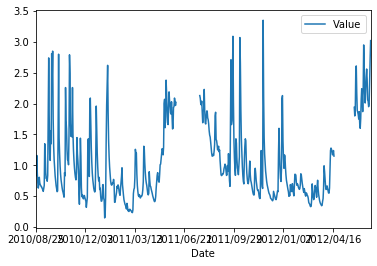

In [115]:
new_df.plot('Date', 'Value')